In [158]:
# Dependencies
import tweepy
import json
import numpy as np
from config import consumer_key, consumer_secret, access_token, access_token_secret
import matplotlib.pyplot as plt
from pprint import pprint

In [116]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [163]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [164]:
# Target Search Term
target_term = "spacex"

In [165]:
# Lists to hold sentiments
compound_list = []
# Grab 25 tweets
public_tweets = api.search(target_term, count=100, lang="en", result_type="recent")

In [166]:
public_tweets['statuses'][1]['retweeted_status']['text']

'More photos of today’s Falcon 9 launch of Dragon to the @Space_Station → https://t.co/095WHX44BX https://t.co/7sSyipmfSf'

In [167]:

public_tweets['statuses'][2]['text']

'RT @yourtake: Amazing! @Mike_Seeley captured this image of the stunning sunrise launch of the #SpaceX #CRS15 #Falcon9 from the roof of the…'

In [168]:
tweets = []
sentiments = []
followers = []
for tweet in public_tweets['statuses']:
    tweets.append(tweet['text'])
    followers.append(tweet['user']['followers_count'])
    result = analyzer.polarity_scores(tweet["text"])
    sentiments.append(result['compound'])
print(followers)

[37099, 720, 30, 7738, 45, 0, 167, 6, 4578, 293, 16, 20, 1, 113, 1104, 426, 29, 1198, 14, 1104, 94, 197, 717, 269, 67, 43, 357, 43, 169, 42, 30, 269, 613, 27, 30, 485, 14865, 44, 7462, 2339, 5665, 48, 84, 2802, 78, 139, 2024, 476, 3274, 161, 320, 6, 1978, 134, 74, 60, 1045, 448, 207, 134, 2121, 2533, 412, 161, 37, 4466, 284, 789, 82, 854, 154, 64, 133, 84, 98, 951, 66, 51, 1534, 157, 157, 46, 109, 142, 15, 626, 289, 568, 400, 738, 121, 328, 431, 61, 3210, 335, 3459, 6669, 54583, 1705]


In [169]:
pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Jun 30 20:08:58 +0000 2018',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 28184452,
                                 'id_str': '28184452',
                                 'indices': [3, 17],
                                 'name': 'NASA Marshall',
                                 'screen_name': 'NASA_Marshall'},
                                {'id': 1451773004,
                                 'id_str': '1451773004',
                                 'indices': [41, 55],
                                 'name': 'Intl. Space Station',
                                 'screen_name': 'Space_Station'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1013152436440088576,
 'id_str': '1013152436440088576',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': N

IndexError: list index out of range

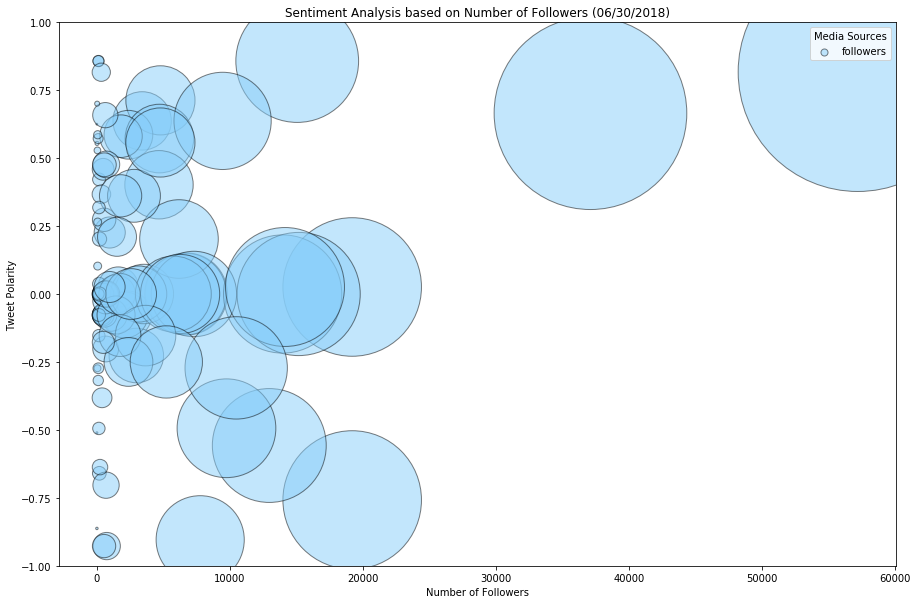

In [156]:
plt.figure(figsize= (15,10))
plt.scatter(followers, sentiments, color="lightskyblue", edgecolor="black"
            , label="followers", alpha=0.5, s=followers, linewidths=1)

plt.title("Sentiment Analysis based on Number of Followers (06/30/2018)")
plt.xlabel("Number of Followers")
plt.ylabel("Tweet Polarity")
#plt.xlim ([followers.max()+5, followers.min()])
plt.ylim (-1.0,1.0)

lgnd=plt.legend(loc="upper right", title="Media Sources", scatterpoints=1)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[0]._sizes = [50]

plt.savefig("output_8_1.png")
plt.show()